In [41]:
pip install tableone

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from tableone import TableOne
from scipy import stats

**Paso 1: Postulacion de Problema y Recoleccion de Datos**

In [2]:
#carga de datos a dataframe
url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'
df = pd.read_csv(url)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Paso 2: Exploracion y Limipeza de Datos**

In [3]:
#dimensiones
n_rows = df.shape[0]
n_columns = df.shape[1]
print(f'La tabla contiene {n_rows} filas y {n_columns} columnas')

La tabla contiene 1338 filas y 7 columnas


In [4]:
# Columnas, tipos de dato y valores nulos
i = 1

for col in df.columns:
    print(f'{i}- {col}: {df[col].dtype}, {df[col].isna().sum()} nulos')
    i += 1

1- age: int64, 0 nulos
2- sex: object, 0 nulos
3- bmi: float64, 0 nulos
4- children: int64, 0 nulos
5- smoker: object, 0 nulos
6- region: object, 0 nulos
7- charges: float64, 0 nulos


**2.1 Eliminar Duplicados**

In [5]:
# detect duplicates (?)
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [6]:
df = df.drop_duplicates().reset_index(drop=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


- Una fila duplicada eliminada

**2.2 Eliminar Informacion Irrelevante**

- No aplica

**Paso 3: Analisis de Variables Univariadas**

**3.1 Analisis de Variables Categoricas**

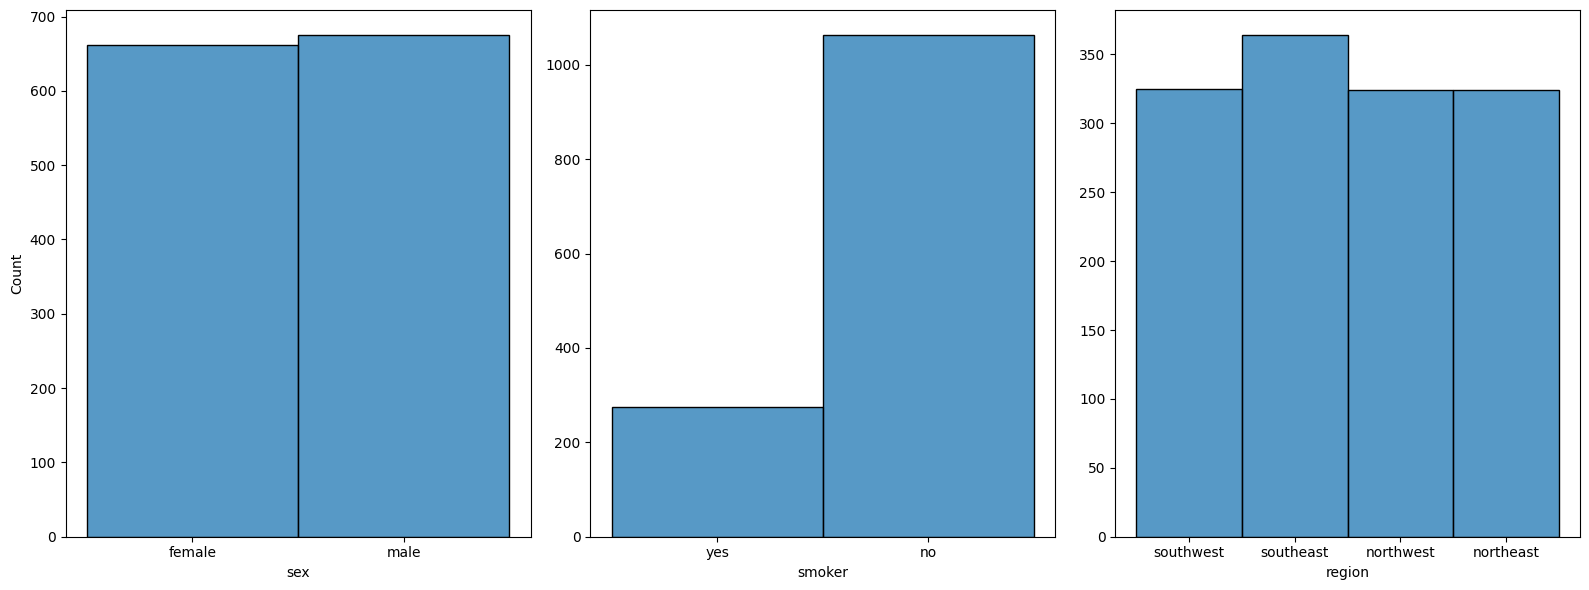

In [7]:
#crear grilla para graficos
fig, axis = plt.subplots(1, 3, figsize = (16, 6))

#crear multiples histogramas
sns.histplot(ax = axis[0], data = df, x = "sex")
sns.histplot(ax = axis[1], data = df, x = "smoker").set(ylabel = None)
sns.histplot(ax = axis[2], data = df, x = "region").set(ylabel = None)

# ajustar y mostrar graficos
plt.tight_layout()
plt.show()

- Distribucion de genero es practicamente equitativa
- Existe una proporcion aproximada de fumadores a no fumadores de 1:5
- La distribucion entre regiones es muy similar, excepto en el sudeste donde parece haber 20 a 30 registros mas

**3.2 Analisis de Variables Numericas**

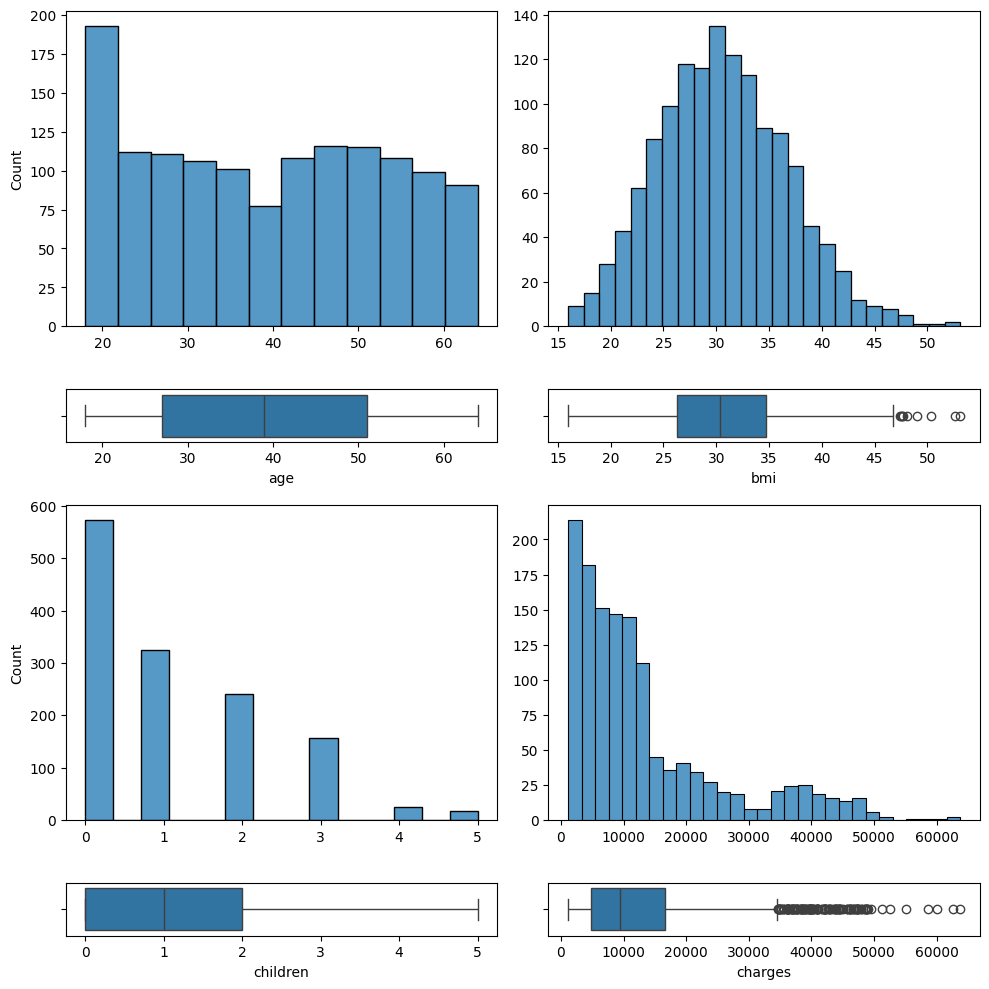

In [8]:
fig, axis = plt.subplots(4, 2, figsize = (10, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = df, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "age")
sns.histplot(ax = axis[0, 1], data = df, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "bmi")
sns.histplot(ax = axis[2, 0], data = df, x = "children").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "children")
sns.histplot(ax = axis[2, 1], data = df, x = "charges").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "charges")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

- Los rangos de edades rodean en general los 100 registros en cada uno, con las excepciones del rango en torno a 20 años (casi 200 registros) y el rango en torno a 40 años (alrededor de 75 registros). Consecuemente, la mediana de la distribucion de edades se ve levemente desplazada hacia la izquierda respecto del centro del rango global de edades.
- La distribucion de registros de IMC es practicamente normal, con algunos datos atipicos hacia la derecha y una media y mediana en torno al valor 30.
- La distribucion de la cantidad de niños se ve claramente desplazada hacia la izquierda, con la mitad de los registros con valores de 0 y 1.
- La mitad de los seguros de menor valor se encuentra entre 1,000 y 10,000. La mitad superior es mas dispersa, con valores concentrados entre los 10,000 y los 35,000 y datos atipicos hasta los 65,000.

**Paso 4: Analisis de Variables Multivariadas**

**4.1 Analisis Numerico-Numerico**

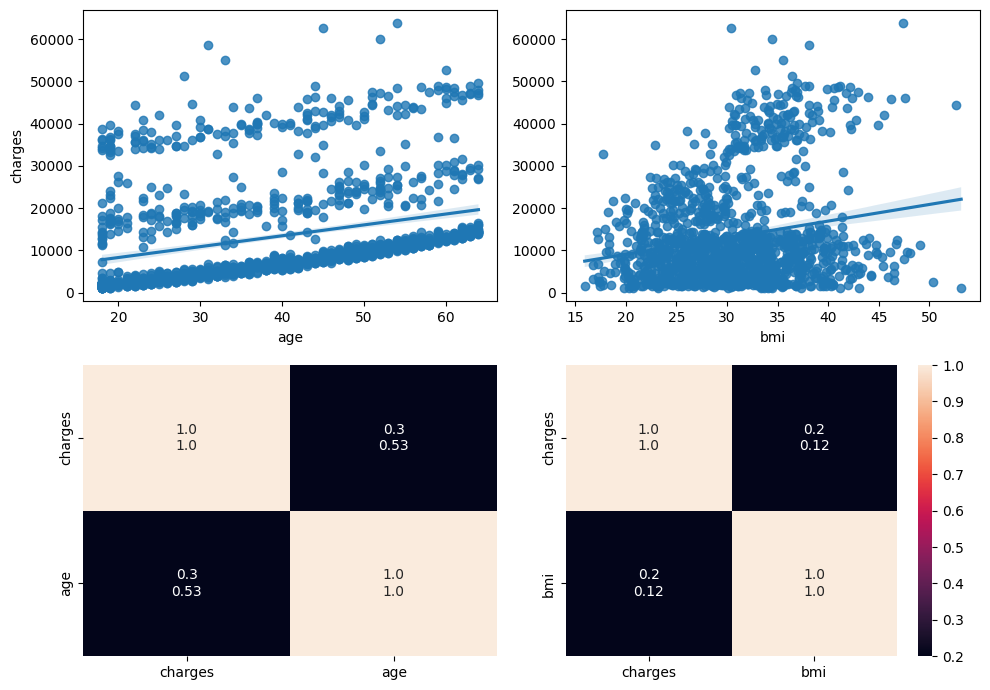

In [9]:
#crear grilla para graficos
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

#calcular matrices de correlacion
charges_age_pcorr = df[["charges", "age"]].corr(method="pearson").round(2)
charges_age_scorr = df[["charges", "age"]].corr(method="spearman").round(2)
charges_age_annotations = charges_age_pcorr.astype(str) + "\n" + charges_age_scorr.astype(str)

charges_bmi_pcorr = df[["charges", "bmi"]].corr(method="pearson").round(2)
charges_bmi_scorr = df[["charges", "bmi"]].corr(method="spearman").round(2)
charges_bmi_annotations = charges_bmi_pcorr.astype(str) + "\n" + charges_bmi_scorr.astype(str)

#crear diagramas de dispersion
sns.regplot(ax = axis[0, 0], data = df, x = "age", y = "charges")
sns.heatmap(charges_age_pcorr, annot = charges_age_annotations, fmt = "", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = df, x = "bmi", y = "charges").set(ylabel=None)
sns.heatmap(charges_bmi_pcorr, annot = charges_bmi_annotations, fmt = "", ax = axis[1, 1])

# ajuster y mostrar grafico
plt.tight_layout()
plt.show()

- Cargos y edad muestran una correlacion en general moderada. La distribucion de los puntos en el grafico pareciera indicar a priori tres grupos con diferentes logicas de precio, al menos desde el intercepto con el eje y.
- Cargos e IMC muestran una debil correlacion en general.

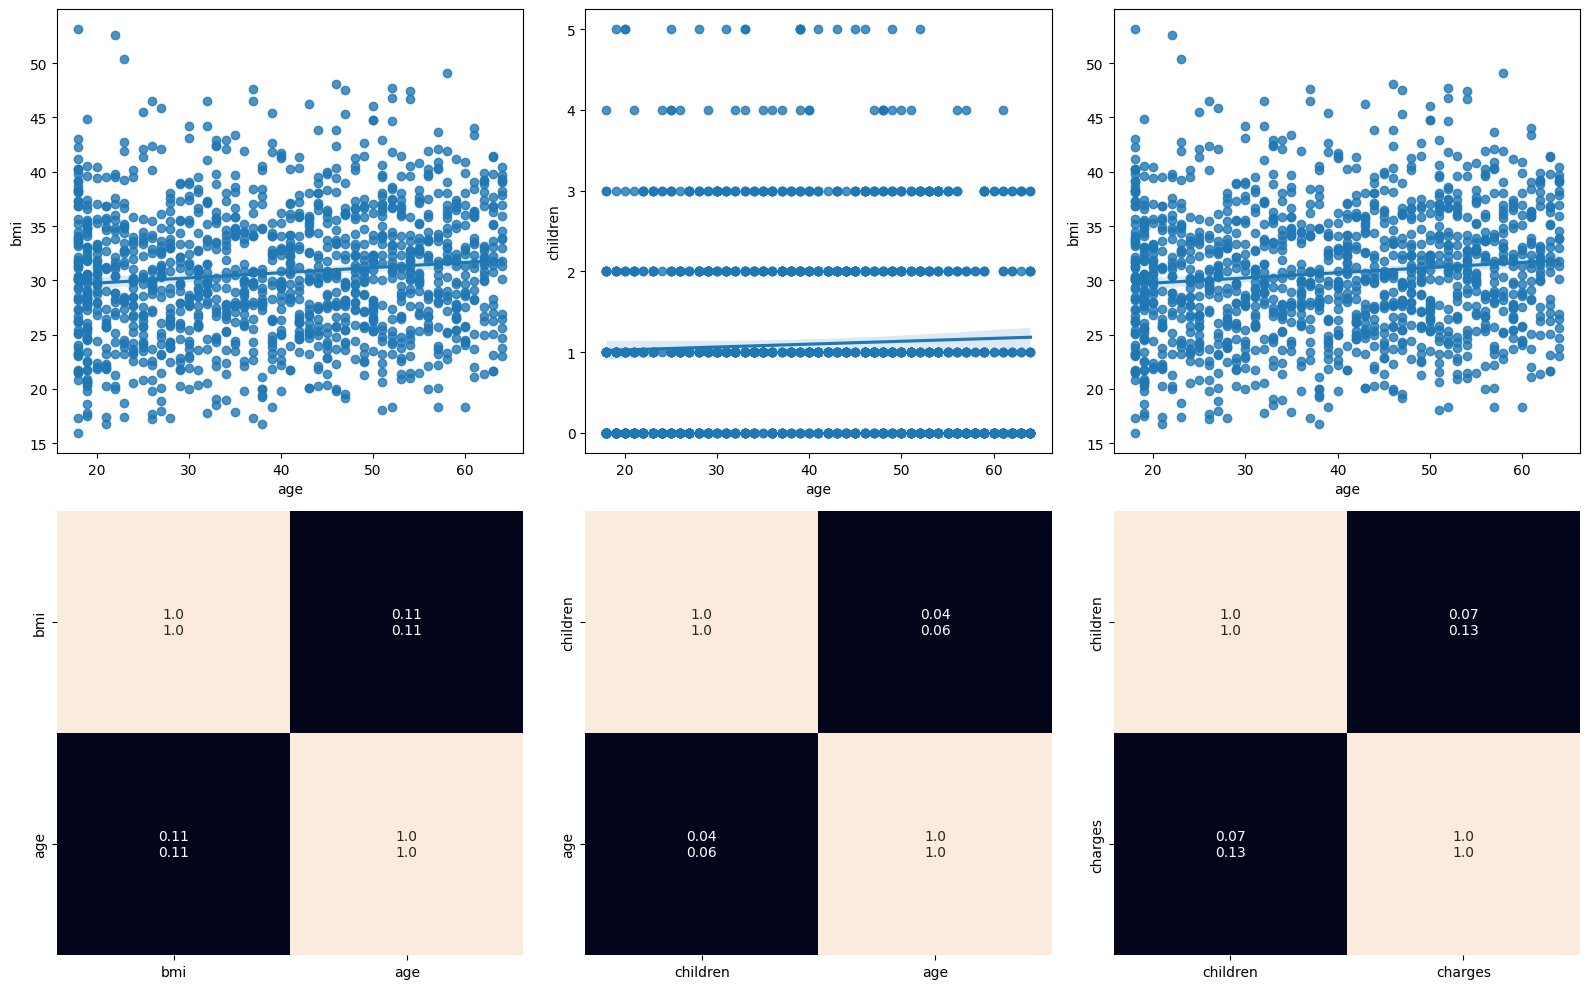

In [10]:
#crear grilla para graficos
fig, axis = plt.subplots(2, 3, figsize = (16, 10))

#calcular matrices de correlacion
bmi_age_pcorr = df[["bmi", "age"]].corr(method="pearson").round(2)
bmi_age_scorr = df[["bmi", "age"]].corr(method="spearman").round(2)
bmi_age_annotations = bmi_age_pcorr.astype(str) + "\n" + bmi_age_scorr.astype(str)

children_age_pcorr = df[["children", "age"]].corr(method="pearson").round(2)
children_age_scorr = df[["children", "age"]].corr(method="spearman").round(2)
children_age_annotations = children_age_pcorr.astype(str) + "\n" + children_age_scorr.astype(str)

children_charges_pcorr = df[["children", "charges"]].corr(method="pearson").round(2)
children_charges_scorr = df[["children", "charges"]].corr(method="spearman").round(2)
children_charges_annotations = children_charges_pcorr.astype(str) + "\n" + children_charges_scorr.astype(str)

#crear multiples diagramas de dispersion
sns.regplot(ax = axis[0, 0], data = df, x = "age", y = "bmi")
sns.heatmap(bmi_age_pcorr, annot = bmi_age_annotations, fmt = "", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = df, x = "age", y = "children")
sns.heatmap(children_age_pcorr, annot = children_age_annotations, fmt = "", ax = axis[1, 1], cbar = False)
sns.regplot(ax = axis[0, 2], data = df, x = "age", y = "bmi")
sns.heatmap(children_charges_pcorr, annot = children_charges_annotations, fmt = "", ax = axis[1, 2], cbar = False)

#ajustar y mostrar grafico
plt.tight_layout()
plt.show()

- Los valores de IMC muestran una debil correlacion con la edad, con valores altos y bajos del indice distribuidos de forma aparentemente equitativa a lo largo de las edades de los individuos
- El resto de las variables no muestra signos de correlacion considerables

**4.2 Analisis Categorico-Categorico**

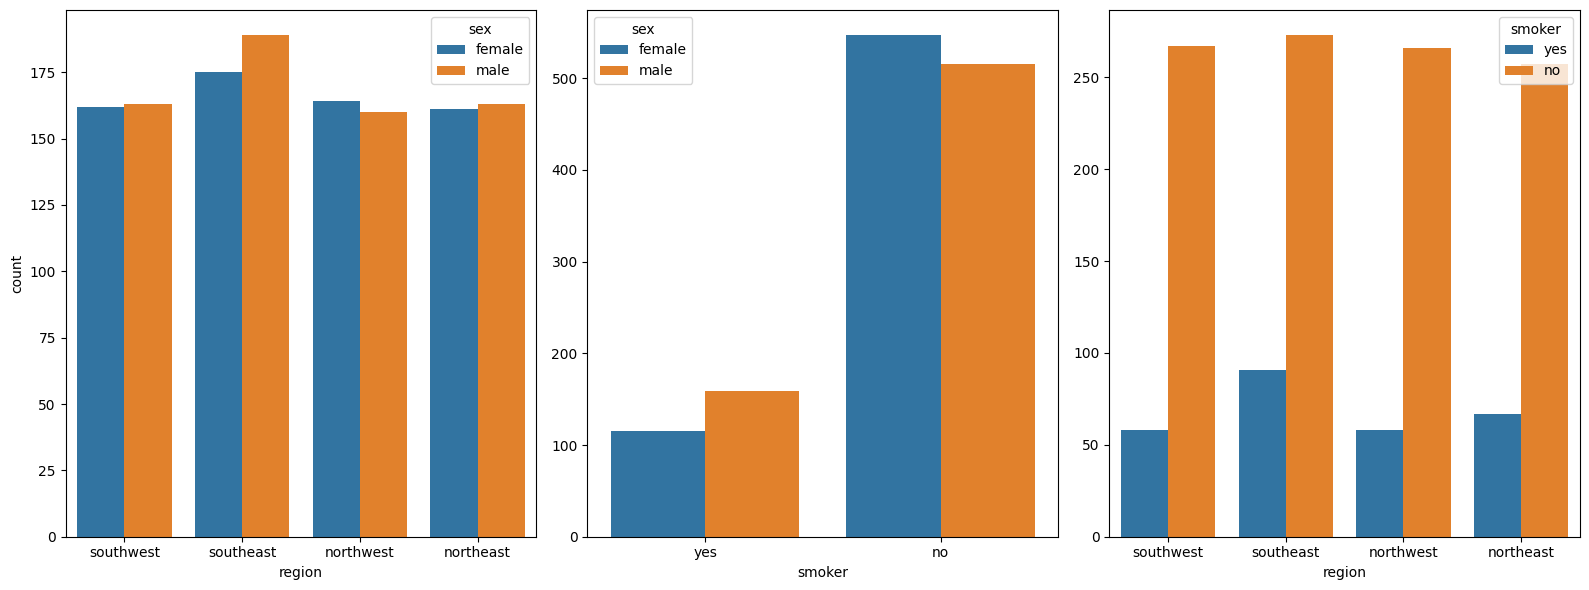

In [11]:
#crear grilla para graficos
fig, axis = plt.subplots(1, 3, figsize = (16, 6))

#crear graficos de barra
sns.countplot(ax = axis[0], data = df, x = "region", hue = "sex")
sns.countplot(ax = axis[1], data = df, x = "smoker", hue = "sex").set(ylabel = None)
sns.countplot(ax = axis[2], data = df, x = "region", hue = "smoker").set(ylabel = None)

# ajustar y mostrar grafico
plt.tight_layout()
plt.show()

- La muestra por region mantiene proporciones similares en terminos de genero y fumadores/no fumadores
- Parece haber una mayor proporcion de hombres fumadores. Las diferencias relativas son menores en terminos de genero para no fumadores

**4.3 Combinacion de Variables con varios Predictores**

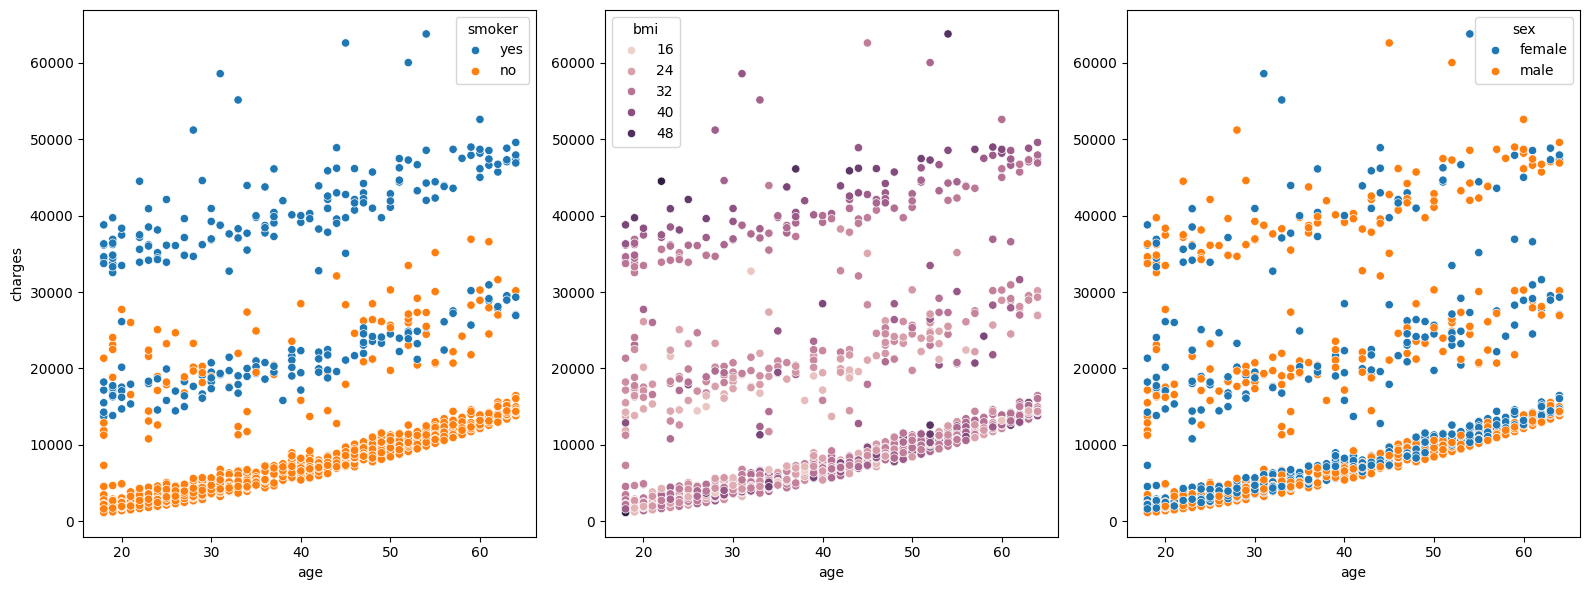

In [12]:
#crear grilla para graficos
fig, axis = plt.subplots(1, 3, figsize = (16, 6))

#crear diagrama de dispersion
sns.scatterplot(ax = axis[0], data = df, x = "age", y = "charges", hue='smoker')
sns.scatterplot(ax = axis[1], data = df, x = "age", y = "charges", hue ='bmi').set(ylabel = None)
sns.scatterplot(ax = axis[2], data = df, x = "age", y = "charges", hue ='sex').set(ylabel = None)

plt.tight_layout()

plt.show()

- Ser fumador/no fumador muestra una clara general en cuanto a los cargos del seguro medico, con individuos fumadores ubicandose en la parte mas alta de los cobros.
- Valores altos de IMC parecieran tambien tender a ubicarse en la parte alta de la distribucion de los cargos.
- El genero no pareciera tener mayor influencia en los niveles de los cobros.

**4.4 Analisis de Correlacion**

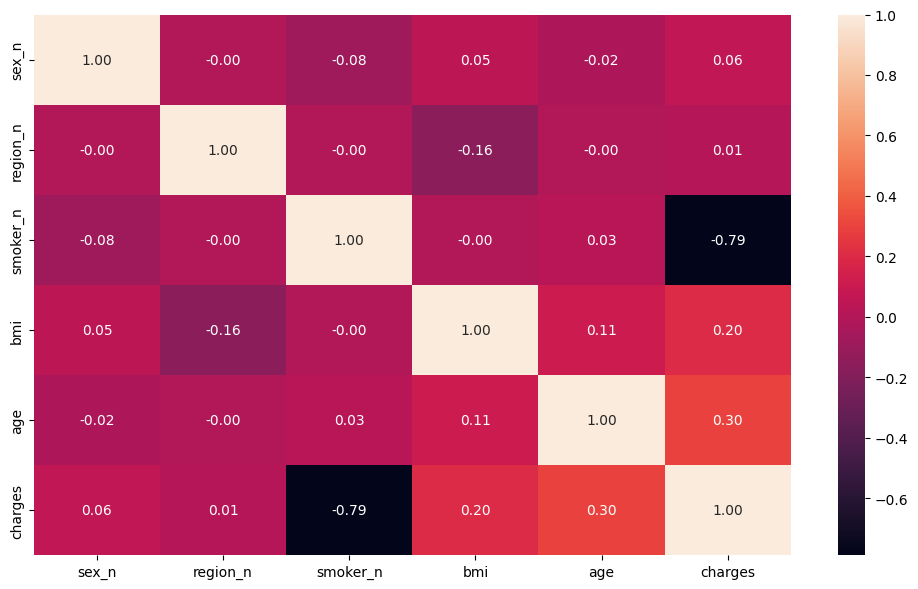

In [13]:
#crear nuevo df para correlacion
df_corr = df.copy()

#convertir variables categoricas a numericas
df_corr["sex_n"] = pd.factorize(df["sex"])[0]
df_corr["region_n"] = pd.factorize(df["region"])[0]
df_corr["smoker_n"] = pd.factorize(df["smoker"])[0]

#crear grilla para grafico
fig, axis = plt.subplots(figsize = (10, 6))

#crear mapa de calor con correlaciones
sns.heatmap(df_corr[["sex_n", "region_n", "smoker_n", "bmi", "age", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

- Las 3 variables de mayor influencia sobre los cargos, en orden decreciente de magnitud de influencia son:
    - Fumador/no fumador (negativa, fuerte)
    - Edad (positiva, moderada)
    - Bmi (positiva, moderada/debil) 

**4.3 Analisis Numerico-Categorico**

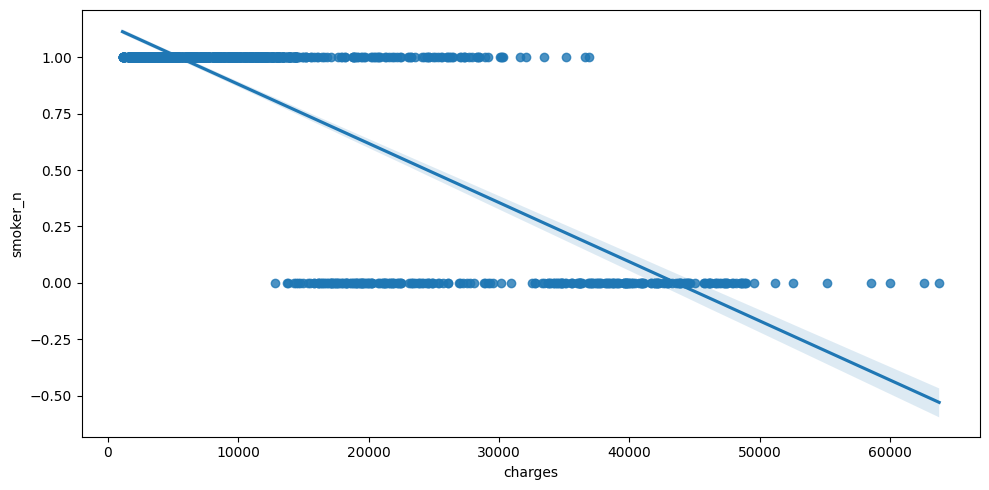

In [14]:
#crear grilla para grafico
fig, axis = plt.subplots(figsize = (10, 5))

#crear plot de regresion para cargos segun fumador/no fumador
sns.regplot(data = df_corr, x = "charges", y = "smoker_n")

#ajustar y mostrar grafico
plt.tight_layout()
plt.show()

- Se nota una clara diferencia en los rangos de los cargos para fumadores y no fumadores

**Paso 5: Ingenieria de Caracteristicas**

**5.1 Analisis de Valores Atipicos**

In [15]:
#analisis descriptivo
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


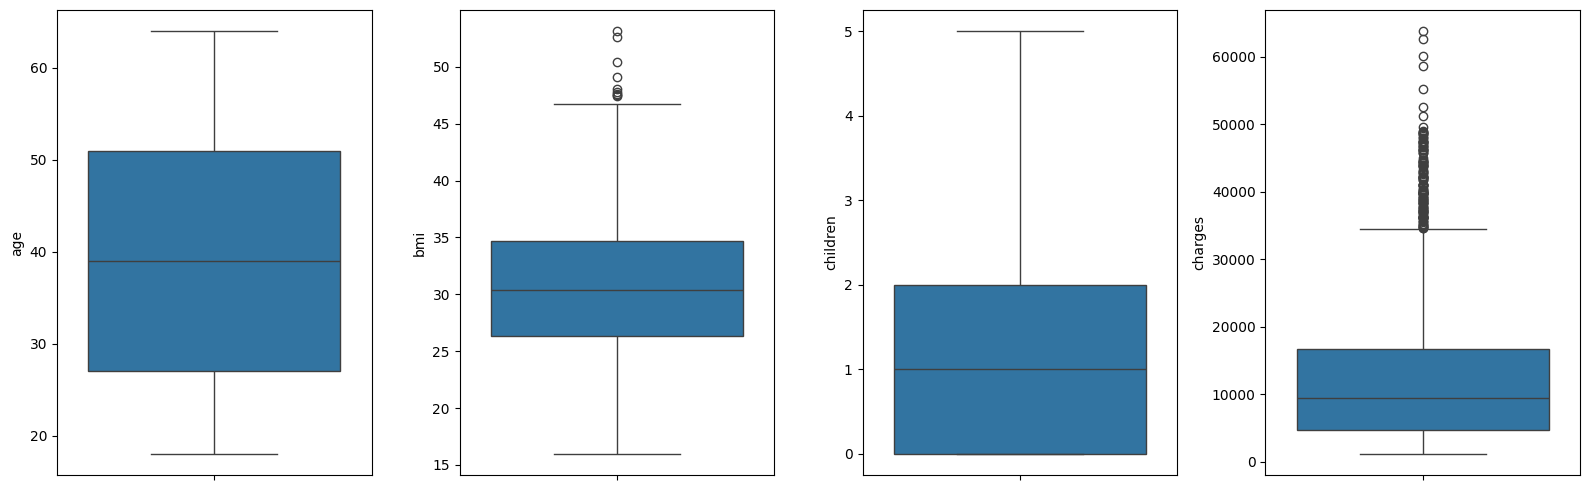

In [16]:
#grilla para graficos
fig, axis = plt.subplots(1, 4, figsize = (16, 5))

#grafico de caja de variables numericas para visualizar valores atipicos
sns.boxplot(ax = axis[0], data = df, y = "age")
sns.boxplot(ax = axis[1], data = df, y = "bmi")
sns.boxplot(ax = axis[2], data = df, y = "children")
sns.boxplot(ax = axis[3], data = df, y = "charges")

#ajustar y mostrar grafico
plt.tight_layout()
plt.show()

- Se asume que los datos atipicos siguen siendo legitimos, por lo tanto se conservan

**5.2 Analisis de Valores Faltantes**

- No aplica

**5.3 Inferencia de Nuevas Caracteristicas**

- No aplica

**Paso 6: Seleccion de Caracteristicas**

In [17]:
# funcion para indetificar columnas binarias
def is_bool(df, cols):
  df_ = df.copy()
  bool_vars = []
  for col in cols:
    if (df[col].dtype == int) or (df[col].dtype == float):
      flag = True
      unique_list = df[col].unique()
      for value in unique_list:
        if (value not in [1, 0, 0.0, 1.0]) and (np.isnan(value) == False):
          flag = False
      if flag == True:
        bool_vars.append(col)
  return bool_vars

def breakdown_vars(df):
  categorical_vars = []
  boolean_vars = []
  normal_vars = []
  non_normal_vars = []
  boolean_vars = is_bool(df, df.columns)
  for col in df.columns:
    if (df[col].dtype == 'object' or df[col].dtype == 'category') and col not in boolean_vars:
      categorical_vars.append(col)
    elif (df[col].dtype == 'int64' or df[col].dtype == 'float64') and col not in boolean_vars:
      n, p = stats.shapiro(df[col])
      if p < 0.05:
        non_normal_vars.append(col)
      else:
        normal_vars.append(col)
  return categorical_vars,  boolean_vars, normal_vars, non_normal_vars

In [18]:
categorical_vars, boolean_vars, normal_vars, non_normal_vars =  breakdown_vars(df)
categorical_vars, boolean_vars, normal_vars, non_normal_vars

(['sex', 'smoker', 'region'], [], [], ['age', 'bmi', 'children', 'charges'])

In [19]:
my_table = TableOne(df,
                    categorical= categorical_vars,
                    nonnormal = non_normal_vars,
                    groupby = 'region',
                    pval = True,
                    htest_name=True
                    )
my_table

Grouped by region                                                                                                                                                      
                                             Missing                  Overall                 northeast                northwest                southeast                southwest P-Value            Test
n                                                                        1337                       324                      324                      364                      325                        
age, median [Q1,Q3]                                0         39.0 [27.0,51.0]          39.5 [27.0,51.0]         39.0 [26.0,51.2]         39.0 [26.8,51.0]         39.0 [27.0,51.0]   0.934  Kruskal-Wallis
sex, n (%)               female                                    662 (49.5)                161 (49.7)               164 (50.6)               175 (48.1)               162 (49.8)   0.924     Chi-squared
                         male                                      675 (50.5)                163 (50.3)               160 (49.4)               189 (51.9)               163 (50.2)                        
bmi, median [Q1,Q3]                                0         30.4 [26.3,34.7]          28.9 [24.9,32.9]         28.9 [25.7,32.8]         33.3 [28.6,37.8]         30.3 [26.9,34.6]  <0.001  Kruskal-Wallis
children, median [Q1,Q3]                           0            1.0 [0.0,2.0]             1.0 [0.0,2.0]            1.0 [0.0,2.0]            1.0 [0.0,2.0]            1.0 [0.0,2.0]   0.474  Kruskal-Wallis
smoker, n (%)            no                                       1063 (79.5)                257 (79.3)               266 (82.1)               273 (75.0)               267 (82.2)   0.064     Chi-squared
                         yes                                       274 (20.5)                 67 (20.7)                58 (17.9)                91 (25.0)                58 (17.8)                        
region, n (%)            northeast                                 324 (24.2)               324 (100.0)                                                                             <0.001     Chi-squared
                         northwest                                 324 (24.2)                                        324 (100.0)                                                                          
                         southeast                                 364 (27.2)                                                                 364 (100.0)                                                 
                         southwest                                 325 (24.3)                                                                                          325 (100.0)                        
charges, median [Q1,Q3]                            0  9386.2 [4746.3,16657.7]  10057.7 [5194.3,16687.4]  8977.0 [4733.6,14788.7]  9294.1 [4440.9,19526.3]  8798.6 [4751.1,13462.5]   0.202  Kruskal-Wallis

In [20]:
my_table = TableOne(df,
                    categorical= categorical_vars,
                    nonnormal = non_normal_vars,
                    groupby = 'sex',
                    pval = True,
                    htest_name=True
                    )
my_table

Grouped by sex                                                                                                   
                                          Missing                  Overall                   female                     male P-Value            Test
n                                                                     1337                      662                      675                        
age, median [Q1,Q3]                             0         39.0 [27.0,51.0]         40.0 [27.0,51.8]         39.0 [26.0,51.0]   0.470  Kruskal-Wallis
sex, n (%)               female                                 662 (49.5)              662 (100.0)                           <0.001     Chi-squared
                         male                                   675 (50.5)                                       675 (100.0)                        
bmi, median [Q1,Q3]                             0         30.4 [26.3,34.7]         30.1 [26.1,34.3]         30.7 [26.4,35.0]   0.102  Kruskal-Wallis
children, median [Q1,Q3]                        0            1.0 [0.0,2.0]            1.0 [0.0,2.0]            1.0 [0.0,2.0]   0.550  Kruskal-Wallis
smoker, n (%)            no                                    1063 (79.5)               547 (82.6)               516 (76.4)   0.006     Chi-squared
                         yes                                    274 (20.5)               115 (17.4)               159 (23.6)                        
region, n (%)            northeast                              324 (24.2)               161 (24.3)               163 (24.1)   0.924     Chi-squared
                         northwest                              324 (24.2)               164 (24.8)               160 (23.7)                        
                         southeast                              364 (27.2)               175 (26.4)               189 (28.0)                        
                         southwest                              325 (24.3)               162 (24.5)               163 (24.1)                        
charges, median [Q1,Q3]                         0  9386.2 [4746.3,16657.7]  9413.0 [4885.2,14454.7]  9377.9 [4654.0,19006.7]   0.694  Kruskal-Wallis

In [21]:
my_table = TableOne(df,
                    categorical= categorical_vars,
                    nonnormal = non_normal_vars,
                    groupby = 'smoker',
                    pval = True,
                    htest_name=True
                    )
my_table

Grouped by smoker                                                                                                     
                                             Missing                  Overall                       no                        yes P-Value            Test
n                                                                        1337                     1063                        274                        
age, median [Q1,Q3]                                0         39.0 [27.0,51.0]         40.0 [27.0,52.0]           38.0 [27.0,49.0]   0.346  Kruskal-Wallis
sex, n (%)               female                                    662 (49.5)               547 (51.5)                 115 (42.0)   0.006     Chi-squared
                         male                                      675 (50.5)               516 (48.5)                 159 (58.0)                        
bmi, median [Q1,Q3]                                0         30.4 [26.3,34.7]         30.3 [26.3,34.4]           30.4 [26.1,35.2]   0.935  Kruskal-Wallis
children, median [Q1,Q3]                           0            1.0 [0.0,2.0]            1.0 [0.0,2.0]              1.0 [0.0,2.0]   0.554  Kruskal-Wallis
smoker, n (%)            no                                       1063 (79.5)             1063 (100.0)                             <0.001     Chi-squared
                         yes                                       274 (20.5)                                         274 (100.0)                        
region, n (%)            northeast                                 324 (24.2)               257 (24.2)                  67 (24.5)   0.064     Chi-squared
                         northwest                                 324 (24.2)               266 (25.0)                  58 (21.2)                        
                         southeast                                 364 (27.2)               273 (25.7)                  91 (33.2)                        
                         southwest                                 325 (24.3)               267 (25.1)                  58 (21.2)                        
charges, median [Q1,Q3]                            0  9386.2 [4746.3,16657.7]  7345.7 [3988.9,11363.0]  34456.3 [20826.2,41019.2]  <0.001  Kruskal-Wallis

**6.1 Codificación**

**6.1.1 Label Encoder**

In [22]:
# label_encoder = LabelEncoder()
# df['region_encoded'] = label_encoder.fit_transform((df['region']))
# df['sex_encoded'] = label_encoder.fit_transform((df['sex']))
# df['smoker_encoded'] = label_encoder.fit_transform((df['smoker']))
# df

**6.1.2 One-Hot Encoder**

In [ ]:
# #one hot encoder para variables categoricas
# onehot_encoder = OneHotEncoder(handle_unknown='ignore', feature_name_combiner='concat')

# #obtener data transformada
# transformed_data = onehot_encoder.fit_transform(df[[AGREGAR NOMBRES VARIABLES CATEGORICAS]]).toarray()

# #obtener nombres de variables
# feature_names = onehot_encoder.get_feature_names_out([AGREGAR NOMBRES VARIABLES CATEGORICAS])

# # crear dataframe con data transformada y nombres de variables
# ohe_df = pd.DataFrame(transformed_data, columns=feature_names)
# df = df.join(ohe_df)
# df

**6.2 Factorizacion y Escalamiento de Caracteristicas**

**6.2.1 Escalamiento Min-Max**

In [24]:
#factorizacion
df["sex_n"] = pd.factorize(df["sex"])[0]
df["smoker_n"] = pd.factorize(df["smoker"])[0]
df["region_n"] = pd.factorize(df["region"])[0]

X = ['age', 'bmi', 'children', 'sex_n', 'smoker_n', 'region_n', 'charges']

scaler = MinMaxScaler()
# df_scaled = scaler.fit_transform(df[X])
# df_scaled = pd.DataFrame(df_scaled, index=df.index, columns = X)

X = df[X].drop('charges', axis=1)
y = df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1332    10600.54830
1333     2205.98080
1334     1629.83350
1335     2007.94500
1336    29141.36030
Name: charges, Length: 1337, dtype: float64

**6.2.2 Escalamiento Estandar**

In [25]:
# #escalamiento estandar
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# X_test_scaled

**6.3 Preparacion de Datos**

In [26]:
# X = df_scaled.drop('charges', axis = 1)
# y = df_scaled['charges']
# X

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size  = 0.2, random_state=123)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[0.10869565, 0.03833737, 0.2       , 1.        , 1.        ,
        0.66666667],
       [0.7826087 , 0.82701103, 0.4       , 0.        , 1.        ,
        0.        ],
       [0.15217391, 0.21980091, 0.        , 1.        , 0.        ,
        0.66666667],
       ...,
       [0.47826087, 0.27858488, 0.2       , 1.        , 1.        ,
        0.66666667],
       [0.13043478, 0.35889158, 0.        , 1.        , 1.        ,
        0.        ],
       [0.32608696, 0.64191552, 0.2       , 0.        , 1.        ,
        0.33333333]], shape=(268, 6))

**Paso 7: Elaborar Modelos**

**7.1 Regresion Lineal**

In [28]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled, y_train)

LinearRegression()

In [29]:
linear_regression_model.coef_

array([ 11897.18371408,  11952.47456208,   2491.07334176,   -185.98692562,
       -23356.13969946,   1055.81228733])

In [30]:
y_pred = linear_regression_model.predict(X_test_scaled)
y_pred

array([ 1.13581240e+02,  1.75381771e+04,  2.56577135e+04,  1.28615741e+03,
        1.30139113e+04,  8.69474647e+03,  1.00467389e+04,  9.30523719e+03,
        5.38613280e+03,  3.37808358e+04,  6.09862207e+03,  1.38271354e+04,
        4.75431876e+03,  1.48150303e+04,  1.10425893e+04,  2.79833630e+04,
        1.23729745e+04,  2.80100713e+04,  3.60618298e+04,  6.15551027e+03,
        3.86763072e+04,  1.35706285e+04, -4.41621434e+02,  6.52457096e+03,
        2.55682397e+04,  1.24615654e+04,  1.55164875e+04,  1.52296765e+04,
        1.95329215e+03,  3.88342914e+04,  1.73167105e+03,  1.24379967e+04,
        1.45303623e+04,  3.09659841e+03,  9.57343367e+03,  1.13640510e+04,
        3.73990832e+04,  2.98526057e+03,  3.81590928e+04,  2.82299448e+04,
        6.41381508e+03,  5.83862516e+03,  2.69603154e+04,  1.45899367e+04,
        1.89019727e+03,  3.57981271e+04,  8.73057838e+03,  2.94309004e+04,
        7.57805969e+03,  1.16353453e+04,  1.13164533e+04,  2.98517026e+04,
        3.16180900e+04,  

In [31]:
mean_squared_error(y_test, y_pred)

30916743.976982217

**7.2 Malla Elastica**

In [32]:
# ajuste de hiperparametros para ElasticNet, con distintos valores de alpha y lr
alphas =  [0.00001, 0.0001, 0.001, 0.01, 0.1 , 1, 10, 100, 1000]
lrs = [0, 0.5, 1]
errors_book = {}
promedio = []

for alpha in alphas:
  errors_book[alpha] = {}
  for lr in lrs:
    errors_book[alpha][lr] = []
    kfold = KFold(n_splits = 10, shuffle=True, random_state=123)
    model = ElasticNet(alpha=alpha, l1_ratio = lr, random_state=123)
    for itrain, itest in kfold.split(X_train):
      model.fit(X_train.iloc[itrain], y_train.iloc[itrain])
      errors_book[alpha][lr].append(mean_squared_error(model.predict(X_train.iloc[itest]), y_train.iloc[itest]))
    promedio.append(np.mean(errors_book[alpha][lr]))

min_error = min(promedio)
min_error

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.828e+10, tolerance: 1.378e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.751e+10, tolerance: 1.391e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in s

np.float64(38643808.27455178)

In [33]:
# una vez detectado el error minimo obtenido, resta obtener a que combinacion de hiperparametro corresponde
# nuevo diccionario, esta vez de errores promedio
mean_errors_book = {}

#calculo de errores promedio para cada combinacion de parametros
for alpha in alphas:
  mean_errors_book[alpha] = {}
  for lr in lrs:
    mean_errors_book[alpha][lr] = {}
    mean_errors_book[alpha][lr] = np.mean(errors_book[alpha][lr])

#busqueda de valor minimo de error promedio dentro del nuevo diccionario
for alpha in alphas:
  for lr in lrs:
    if mean_errors_book[alpha][lr] == min_error:
      print(f'best alpha = {alpha}, best lr = {lr}')

best alpha = 10, best lr = 1


**7.3 Regresion Ridge**

In [34]:
ridge_model = Ridge(alpha = 10)
ridge_model.fit(X_train_scaled, y_train)
ridge_model

Ridge(alpha=10)

In [35]:
y_pred = ridge_model.predict(X_test_scaled)
y_pred

array([ 1835.53230028, 16180.75425477, 25568.08705851,  2449.4864316 ,
       12637.85845111,  8667.5520756 ,  9935.38318046,  9740.81936322,
        6306.88686848, 32536.67804066,  6448.79650117, 13317.77786771,
        5328.98306877, 14214.33491778, 10936.91342214, 27055.04247093,
       12590.40110957, 27018.06537612, 34024.27206461,  6747.7321389 ,
       36942.88589614, 13590.06831664,  1182.88208396,  7177.900555  ,
       25233.20889152, 12382.49981671, 14799.5096073 , 14275.09208206,
        2929.52367016, 37085.37482194,  2661.33622848, 11984.38629193,
       14053.61897712,  4111.05843924,  9519.56175442, 11375.71227841,
       35513.39558548,  4286.71242524, 36575.66415111, 27229.76460239,
        6892.28422445,  6897.35842139, 26341.1863363 , 14045.9047045 ,
        3146.90435926, 34156.32354816,  9442.34037253, 28492.64816759,
        7895.3770392 , 11832.38078029, 11667.9141826 , 28683.41086196,
       30826.94405966,  7748.54401181, 11078.05403939, 13320.9856933 ,
      

In [36]:
mean_squared_error(y_test, y_pred)

32754708.536453154

In [37]:
def ridge_gridcv(X_train, y_train):
    model =  Ridge()
    hyperparams = {
        "alpha" : [0.01, 0.1, 1, 10, 100],
        "fit_intercept" :  [True, False],
        "max_iter" : [15000, 30000, 60000]
        }
    cv = kfold = KFold(n_splits = 10, shuffle=True, random_state=123)
    grid_search = GridSearchCV(estimator=model,
                               param_grid=hyperparams,
                               cv=cv,
                               scoring= 'neg_mean_squared_error',)
    grid_result = grid_search.fit(X_train, y_train)
    return grid_result.best_estimator_

In [38]:
best_ridge = ridge_gridcv(X_train_scaled, y_train)
best_ridge

Ridge(alpha=0.1, max_iter=15000)

In [39]:
y_pred = best_ridge.predict(X_test_scaled)
y_pred

array([ 1.34879495e+02,  1.75202866e+04,  2.56583082e+04,  1.29988787e+03,
        1.30088909e+04,  8.69350576e+03,  1.00445762e+04,  9.31067431e+03,
        5.39738946e+03,  3.37672864e+04,  6.10156672e+03,  1.38201419e+04,
        4.76054935e+03,  1.48069880e+04,  1.10409235e+04,  2.79727684e+04,
        1.23762823e+04,  2.79980293e+04,  3.60372330e+04,  6.16214564e+03,
        3.86572131e+04,  1.35714230e+04, -4.22042822e+02,  6.53223136e+03,
        2.55655717e+04,  1.24605757e+04,  1.55074468e+04,  1.52166092e+04,
        1.96447729e+03,  3.88154086e+04,  1.74200616e+03,  1.24316156e+04,
        1.45244496e+04,  3.10877485e+03,  9.57211116e+03,  1.13638627e+04,
        3.73776021e+04,  3.00140736e+03,  3.81425189e+04,  2.82178437e+04,
        6.41929349e+03,  5.85223923e+03,  2.69538772e+04,  1.45826599e+04,
        1.90513296e+03,  3.57793386e+04,  8.73994338e+03,  2.94203080e+04,
        7.58118410e+03,  1.16385724e+04,  1.13217487e+04,  2.98380915e+04,
        3.16109177e+04,  

In [40]:
mean_squared_error(y_test, y_pred)

30930343.845125113

- La Regresion Linear regular para estos datos da cuenta de un mejor modelo de prediccion en comparacion a Malla Elastica y Ridge, ya que muestra un menor error cuadrado medio.